#今回の目的#
mpgを正解データとして、燃費を予測します。

#使用するデータ#
auto-mpg.csv


#燃費とは？#
「きちんと知りたい！自動車低燃費メカニズムの基礎知識」
（日刊工業新聞社）より。

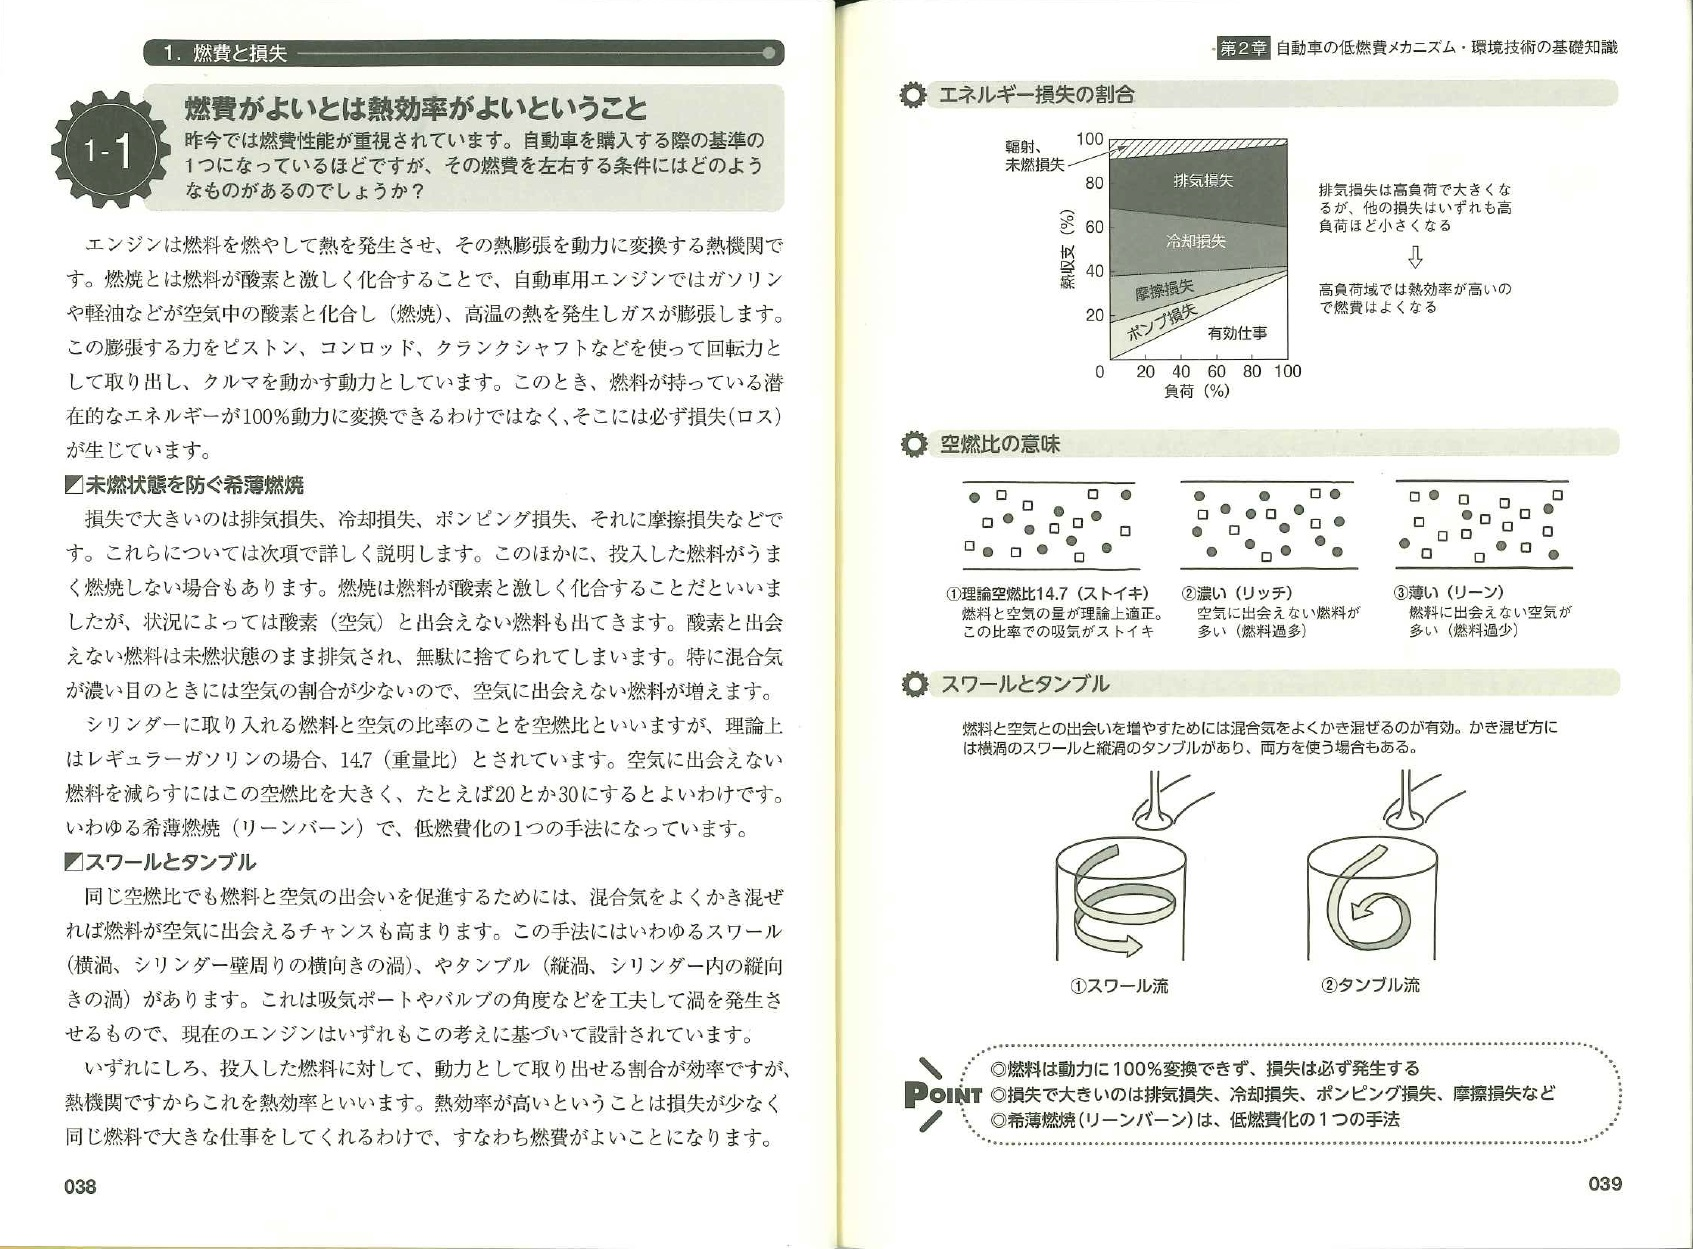

In [ ]:
# 絶対使うであろうモジュールのインポート
import pandas as pd

from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mkdir data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
cd /content/data

/content/data


In [ ]:
# 1.csvの読み込み
df = pd.read_csv('auto_mgp.csv')
# 2.カテゴリカルデータ(文字列などのデータ)の確認
# 確認する→ダミー変数化の処理は無し
df.head(5)

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,0,18.0,8,307.0,130.0,3504,12.0,70,1
1,1,15.0,8,350.0,165.0,3693,11.5,70,1
2,2,18.0,8,318.0,150.0,3436,11.0,70,1
3,3,16.0,8,304.0,150.0,3433,12.0,70,1
4,4,17.0,8,302.0,140.0,3449,10.5,70,1


In [ ]:
# 4-1.欠損値の確認
df.isnull().sum()

Unnamed: 0      0
MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
# 欠損値補完
df = df.fillna(df.mean())

In [ ]:
# 4-1.欠損値の再確認
df.isnull().sum()

Unnamed: 0      0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
# JupyterLab上にグラフ描画するためのおまじない
get_ipython().magic(u'matplotlib inline')

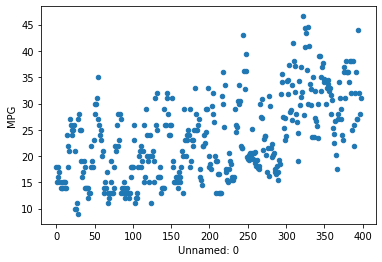

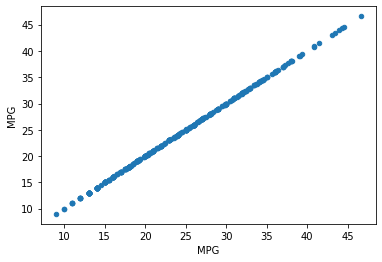

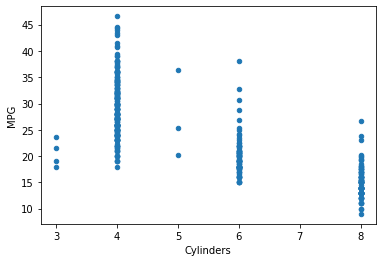

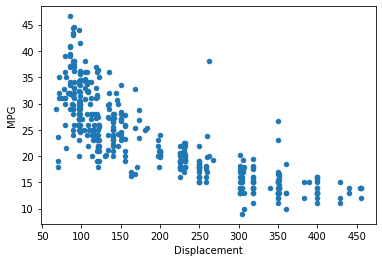

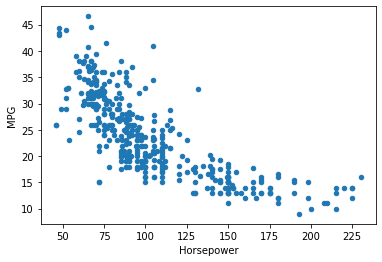

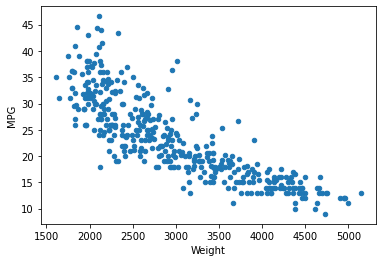

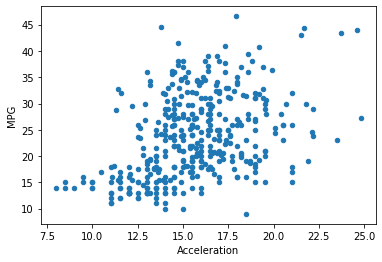

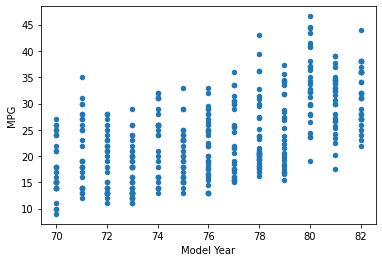

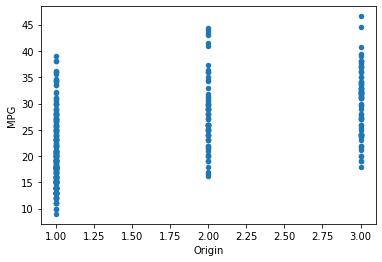

In [ ]:
for name in df.columns:
    df.plot(kind = "scatter", x = name, y = "MPG")

In [ ]:
# 4-2-1.外れ値の行を削除
no = df[(df['MPG'] > 35) & (df['Displacement'] > 200)].index
df = df.drop(no, axis = 0)

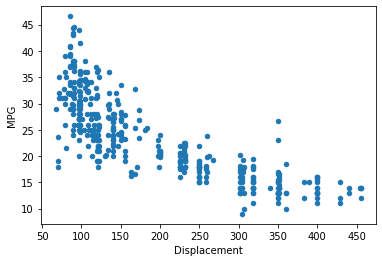

In [ ]:
df.plot(kind = "scatter", x = "Displacement", y = "MPG")

In [ ]:
# 4-2-5.特徴量と正解の分割
# 正解データ抜き出し
t = df[['MPG']]
# 特徴量抜き出し
# x = df.loc[:,['Displacement', 'Horsepower', 'Weight', 'Model Year']]
x = df.loc[:,'Cylinders':'Origin'] # 全ての行とCylinders列～Origin列

# 4-2-3.標準化
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc2 = StandardScaler()
sc_t = sc2.fit_transform(t)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 4-2-4.多項式特徴量と交互作用特徴量を追加
pf = PolynomialFeatures(degree = 2, include_bias = False)
pf_x = pf.fit_transform(sc_x) # 2乗列と交互作用項の追加
pf_x.shape # 行数と列数

# 未知のデータで予測する際に使用するため、データフレームをコピーしておく
future = pf_x

In [ ]:
# 特徴量を追加した後のデータを3行、表示
print(pf_x[:3])

[[ 1.49730956  1.09148553  0.66728993  0.63021162 -1.29300213 -1.62669888
  -0.71650657  2.24193591  1.63429172  0.99913958  0.94362188 -1.93602445
  -2.43567178 -1.07283213  1.19134067  0.7283373   0.68786686 -1.41129312
  -1.77551829 -0.78205655  0.44527585  0.42053386 -0.8628073  -1.08547978
  -0.47811761  0.39716668 -0.81486496 -1.02516453 -0.45155076  1.67185451
   2.10332512  0.92644452  2.64614925  1.16554043  0.51338166]
 [ 1.49730956  1.50410247  1.58384046  0.85339459 -1.47437512 -1.62669888
  -0.71650657  2.24193591  2.25210701  2.37149945  1.27779587 -2.20759596
  -2.43567178 -1.07283213  2.26232425  2.38225835  1.28359291 -2.21761127
  -2.44672181 -1.0776993   2.5085506   1.35164087 -2.33517497 -2.5764315
  -1.13483209  0.72828232 -1.25822375 -1.38821602 -0.61146282  2.17378201
   2.39836436  1.05639946  2.64614925  1.16554043  0.51338166]
 [ 1.49730956  1.1970387   1.19103309  0.54991298 -1.65574812 -1.62669888
  -0.71650657  2.24193591  1.79233749  1.78334522  0.82338997

In [ ]:
# 列名を確認
pf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x5^2',
 'x5 x6',
 'x6^2']

## <B>*(1)通常の線形回帰*</B>

In [ ]:
from sklearn.linear_model import LinearRegression

# 3.訓練データとテストデータの分離　⇒　ホールドアウト法
x_train, x_test, y_train, y_test = train_test_split(pf_x,
    sc_t, test_size = 0.3, random_state = 0)

# 〇　多項式特徴量と交互作用特徴量が無いパターン　〇
# pf_xではなくsc_xを使うと、決定係数が0.81まで下がってしまうので、却下。
# x_train, x_test, y_train, y_test = train_test_split(sc_x,
#    sc_t, test_size = 0.3, random_state = 0)

# 5.学習モデルの選択→◆◆通常の線形回帰◆◆で、過学習が起きることを確認
model = LinearRegression()
# 6.モデルの学習
model.fit(x_train, y_train)

# 7.訓練データの決定係数
print(model.score(x_train, y_train))
# 7.テストデータの決定係数
model.score(x_test, y_test)

0.9082188042425836


0.8598868365761875

## <B>*(2)リッジ回帰*</B>

In [ ]:
from sklearn.linear_model import Ridge # モジュールインポート
# モデルの作成
ridgeModel = Ridge(alpha = 10)

# 6.モデルの学習◆◆リッジ回帰◆◆
ridgeModel.fit(x_train, y_train)

print(ridgeModel.score(x_train, y_train))
print(ridgeModel.score(x_test, y_test))

0.9027246596040486
0.8668508356483847


In [ ]:
maxScore = 0
maxIndex = 0
# range関数により整数列を1～2000生成
for i in range(1, 2001):
    num = i/100
    ridgeModel = Ridge(random_state = 0, alpha = num)
    ridgeModel.fit(x_train, y_train)
    result = ridgeModel.score(x_test, y_test)
    if result > maxScore:
        maxScore = result
        maxIndex = num

print(maxIndex, maxScore)

20.0 0.8693805609317131


## <B>*(3)リッジ回帰(定数を最適化)*</B>

In [ ]:
# モデルの再作成　⇒　定数を20.0に変更
ridgeModel = Ridge(alpha = 20.0)

# 6.モデルの再学習◆◆リッジ回帰◆◆
ridgeModel.fit(x_train, y_train)

print(ridgeModel.score(x_train, y_train))
print(ridgeModel.score(x_test, y_test))

0.8979193864917714
0.8693805609317131


In [ ]:
# 5.学習モデルの選択　→　係数が小さくなっていることを確認
# 線形回帰の係数（絶対値）の合計
print(sum(abs(model.coef_)[0]))
# リッジ回帰の合計
print(sum(abs(ridgeModel.coef_)[0]))

6.088079787298861
2.4710178719250853


# ※多項式特徴量と交互作用特徴量を使用しなかった場合
## ⇒pf_x でなく、元のsc_x を使って、訓練データとテストデータを分離した時。
1. 通常の線形回帰　　0.8175288354064383
2. リッジ回帰　　0.814912032158731

決定係数が下がったため、pf_xを使うこととしました。

# 未知のデータで予測

In [ ]:
# 3行表示し、列数を確認
print(x_train[:3])

[[ 1.49730956e+00  1.98388962e+00  1.97664783e+00  1.47570900e+00
  -1.61947352e+00  2.72711283e-01 -7.16506566e-01  2.24193591e+00
   2.97049688e+00  2.95965368e+00  2.20959319e+00 -2.42485318e+00
   4.08333210e-01 -1.07283213e+00  3.93581801e+00  3.92145110e+00
   2.92764376e+00 -3.21285670e+00  5.41029082e-01 -1.42146994e+00
   3.90713664e+00  2.91695699e+00 -3.20112882e+00  5.39054165e-01
  -1.41628115e+00  2.17771706e+00 -2.38987165e+00  4.02442495e-01
  -1.05735519e+00  2.62269448e+00 -4.41648701e-01  1.16036341e+00
   7.43714438e-02 -1.95399425e-01  5.13381659e-01]
 [-8.54547591e-01 -6.93322632e-01 -1.70699131e-01 -2.98903903e-02
  -3.86137164e-01 -2.69977335e-01  5.31094779e-01  7.30251585e-01
   5.92477185e-01  1.45870531e-01  2.55427610e-02  3.29972583e-01
   2.30708481e-01 -4.53845764e-01  4.80696273e-01  1.18349571e-01
   2.07236841e-02  2.67717635e-01  1.87181397e-01 -3.68220030e-01
   2.91381935e-02  5.10226365e-03  6.59132785e-02  4.60848966e-02
  -9.06574175e-02  8.9343

In [ ]:
# 3行表示し、内容を確認
print(y_train[:3])

[[-0.96094473]
 [-0.18993613]
 [-1.2179476 ]]


In [ ]:
# 3行表示し、内容を確認
print(future[:3])

[[ 1.49730956  1.09148553  0.66728993  0.63021162 -1.29300213 -1.62669888
  -0.71650657  2.24193591  1.63429172  0.99913958  0.94362188 -1.93602445
  -2.43567178 -1.07283213  1.19134067  0.7283373   0.68786686 -1.41129312
  -1.77551829 -0.78205655  0.44527585  0.42053386 -0.8628073  -1.08547978
  -0.47811761  0.39716668 -0.81486496 -1.02516453 -0.45155076  1.67185451
   2.10332512  0.92644452  2.64614925  1.16554043  0.51338166]
 [ 1.49730956  1.50410247  1.58384046  0.85339459 -1.47437512 -1.62669888
  -0.71650657  2.24193591  2.25210701  2.37149945  1.27779587 -2.20759596
  -2.43567178 -1.07283213  2.26232425  2.38225835  1.28359291 -2.21761127
  -2.44672181 -1.0776993   2.5085506   1.35164087 -2.33517497 -2.5764315
  -1.13483209  0.72828232 -1.25822375 -1.38821602 -0.61146282  2.17378201
   2.39836436  1.05639946  2.64614925  1.16554043  0.51338166]
 [ 1.49730956  1.1970387   1.19103309  0.54991298 -1.65574812 -1.62669888
  -0.71650657  2.24193591  1.79233749  1.78334522  0.82338997

In [ ]:
# import numpy as np
# future = [[1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5]]
# future = [[ 1.0,1.9,1.9,1.47,-1.6,2.72,-7.1,2.2, 2.9,2.95,2.20,-2.4, 4.0,-1.0,3.9,3.92, 2.9,-3.21,5.41, -1.4, 3.9,2.91, -3.2,5.3,-1.41,2.17, -2.3,4.0,-1.05,2.62, -4.41,1.1,7.43, -1.95,5.1]]

# 小数点のデータがある、auto_mgp.csvの6行目を借用。
dff = future[4,:]
# floatをintに変換することで未知のデータとして使用。MPGの値を予測する。
# ただし、多項式特徴量と交互作用特徴量の値として、表示される。
print(dff.astype(int))

ridgeModel.predict([dff.astype(int)])

[ 1  1  0  0 -1 -1  0  2  1  1  0 -2 -2 -1  1  0  0 -1 -1  0  0  0 -1 -1
  0  0 -1  0  0  3  2  1  2  1  0]


array([[-0.45951748]])

## <B>*(4)ラッソ回帰*</B>

In [ ]:
from sklearn.linear_model import Lasso

# 3.訓練データとテストデータの分離　⇒　ホールドアウト法
x_train, x_test, y_train, y_test = train_test_split(pf_x,
    sc_t, test_size = 0.3, random_state = 0)

# ◆◆ラッソ回帰◆◆のモデル作成（alphaは正則化項につく定数）
model = Lasso(alpha = 0.1)
# 6.モデルの学習◆◆ラッソ回帰◆◆
model.fit(x_train, y_train)
# 7.訓練データの決定係数の表示
print(model.score(x_train, y_train))
# 7.テストデータの決定係数の表示
print(model.score(x_test, y_test))

0.8287255123158934
0.8363559908511365


In [ ]:
# 4-2-2.特徴量の絞り込み　→　係数が0の項目は、予測を行う上で不要と判断
weight = model.coef_ # 係数抜き出す
# 見やすいようにシリーズ変換
pd.Series(weight, index = pf.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


x0      -0.000000
x1      -0.000000
x2      -0.082317
x3      -0.582921
x4       0.000000
x5       0.285849
x6       0.046682
x0^2    -0.000000
x0 x1    0.000000
x0 x2    0.000000
x0 x3    0.000000
x0 x4   -0.000000
x0 x5   -0.000000
x0 x6   -0.000000
x1^2     0.000000
x1 x2    0.000000
x1 x3    0.000000
x1 x4   -0.000000
x1 x5   -0.000000
x1 x6   -0.000000
x2^2     0.000000
x2 x3    0.004649
x2 x4   -0.000000
x2 x5   -0.000698
x2 x6   -0.000000
x3^2     0.016966
x3 x4   -0.000000
x3 x5   -0.053630
x3 x6   -0.000000
x4^2     0.017867
x4 x5    0.000000
x4 x6    0.000000
x5^2     0.002885
x5 x6    0.000000
x6^2     0.000000
dtype: float64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('auto_mgp.csv')
df = df.fillna(df.mean())
# 4-2-1.外れ値の行を削除
no = df[(df['MPG'] > 35) & (df['Displacement'] > 200)].index
df = df.drop(no, axis = 0)

x = df.loc[:,'Cylinders':'Origin'] # 特徴量抜き出し
t = df['MPG'] # 正解データ抜き出し

# 3.訓練データとテストデータの分離　⇒　ホールドアウト法
x_train, x_test, y_train, y_test = train_test_split(x, t,
    test_size = 0.3, random_state = 0)

## <B>*(5)回帰木*</B>

In [ ]:
# ライブラリインポート(◆◆回帰木◆◆バージョン)
from sklearn.tree import DecisionTreeRegressor

# 木の深さの最大を10と設定
model = DecisionTreeRegressor(max_depth = 10,
random_state = 0)

# 6.モデルの学習◆◆回帰木◆◆
model.fit(x_train, y_train)
# 7.テストデータでの決定係数の表示
model.score(x_test, y_test)

0.7817514241670319

In [ ]:
# 4-2-2.特徴量の絞り込み(値が1に近い項目を採用)
# 特徴量で、ソート
pd.Series( model.feature_importances_, index = x.columns ).sort_values()

Cylinders       0.004646
Origin          0.006039
Acceleration    0.032277
Weight          0.117672
Model Year      0.119960
Horsepower      0.127474
Displacement    0.591931
dtype: float64

# 特徴量の決定(暫定)
- <span style="color: blue">Displacement</span>　　0.591931
- <span style="color: blue">Horsepower</span>　　　0.127474
- <span style="color: blue">Weight</span>　　　　　0.117672
- <span style="color: blue">Model Year</span>　　　0.119960

## <B>*(6)リッジ回帰(特徴量の上位4項目のみ)*</B>

In [ ]:
# 4-2-5.特徴量と正解の分割
# 正解データ抜き出し
t = df[['MPG']]
# 特徴量抜き出し
x = df.loc[:,['Displacement', 'Horsepower', 'Weight', 'Model Year']]
# x = df.loc[:,'Cylinders':'Origin'] # 全ての行とCylinders列～Origin列

# 4-2-3.標準化
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc2 = StandardScaler()
sc_t = sc2.fit_transform(t)

from sklearn.preprocessing import PolynomialFeatures

# 4-2-4.多項式特徴量と交互作用特徴量を追加
pf = PolynomialFeatures(degree = 2, include_bias = False)
pf_x = pf.fit_transform(sc_x) # 2乗列と交互作用項の追加
pf_x.shape # 行数と列数

# 3.訓練データとテストデータの分離　⇒　ホールドアウト法
x_train, x_test, y_train, y_test = train_test_split(pf_x,
    sc_t, test_size = 0.3, random_state = 0)

from sklearn.linear_model import Ridge # モジュールインポート
# モデルの再作成　⇒　定数を20.0に変更
ridgeModel2 = Ridge(alpha = 20.0)

# 6.モデルの再学習◆◆リッジ回帰◆◆
ridgeModel2.fit(x_train, y_train)

print(ridgeModel2.score(x_train, y_train))
print(ridgeModel2.score(x_test, y_test))

0.8798558519175764
0.8639573228430282


# 決定係数とは？？　(テキストp.223より。)
- 決定係数(R-squared:R2)は、<span style="color: red">0 ～ 1</span>の間の値をとり、値が大きくなるほど予測値と実測値の誤差が少ない計算式であることを意味する、回帰モデルの評価に用いる指標
- 一般的に、<span style="color: red">0.8以上</span>であれば、予測性能が高くて良い計算式と言われています

# 各計算モデルと決定係数の結果
1. 通常の線形回帰　　0.8598868365761875
2. リッジ回帰　　0.8668508356483846
3. <span style="color: lime">リッジ回帰(定数を最適化)　　0.8693805609317129</span>
4. ラッソ回帰　　0.8363559908511365
5. 回帰木　　0.7817514241670319
6. リッジ回帰(特徴量の上位4項目のみ)　　0.8639573228430282

In [ ]:
# 8.モデルを保存する
import pickle

with open('fuel.pkl', 'wb') as f:
    pickle.dump(model, f)